# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [73]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

## Dealing with Null values 



In [74]:
data.isnull().sum()
# So no null values

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

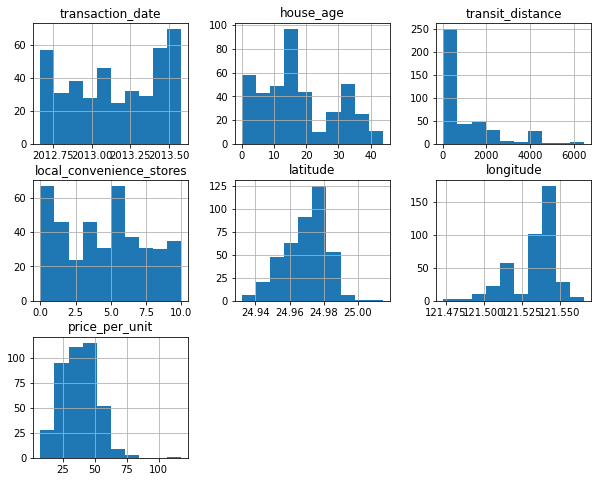

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [75]:
# checking outliers 
import matplotlib.pyplot as plt 
data.hist(figsize=(10,8))
plt.show()
data.describe()

<AxesSubplot:>

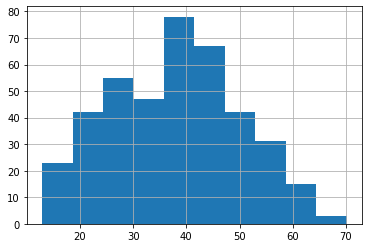

In [76]:
# removing the outliers 
# removing price outliers 
data= data[data.price_per_unit> data.price_per_unit.quantile(0.01)]
data= data[data.price_per_unit< data.price_per_unit.quantile(0.99)]
data.price_per_unit.hist()

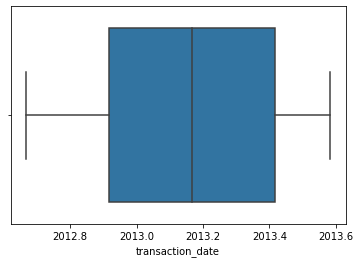

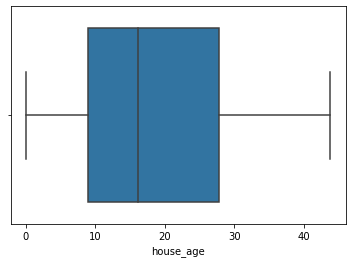

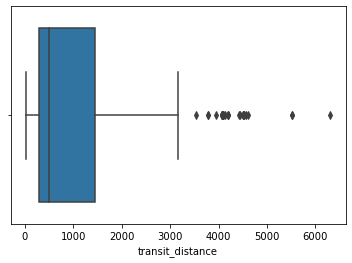

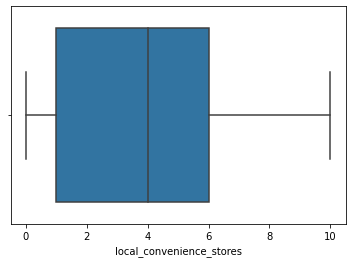

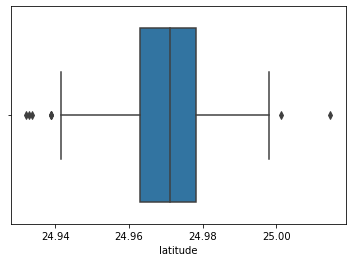

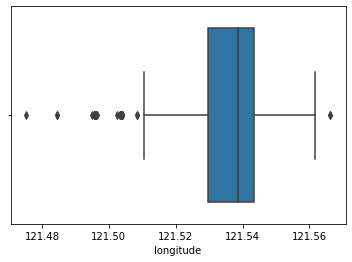

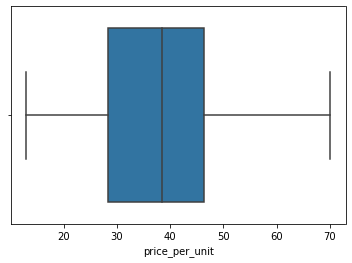

In [77]:
# boxplot to detect outliers and understanding the data 
import seaborn as sns
for col in data.columns:
    sns.boxplot(data=data,x=data[col])
    plt.show()

<AxesSubplot:>

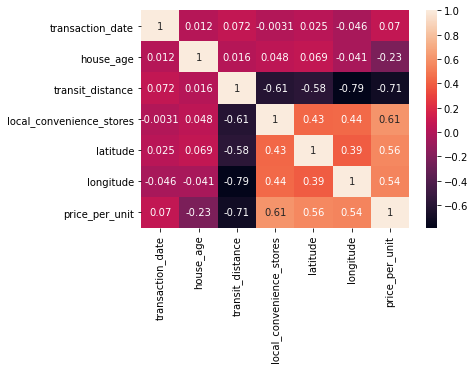

In [78]:
data.price_per_unit.describe(),data.price_per_unit.quantile(0.01)
sns.heatmap(data.corr(),annot=True)

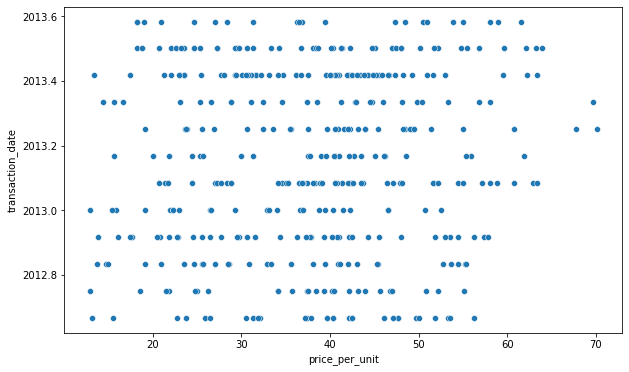

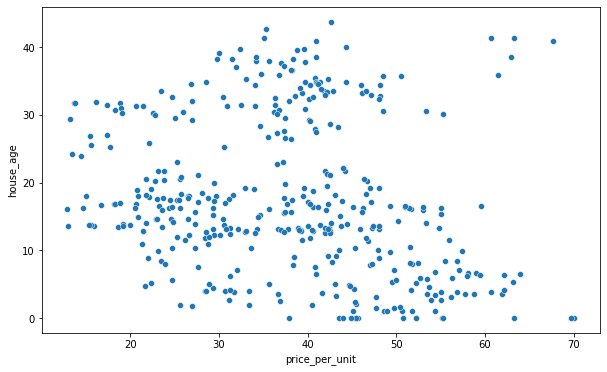

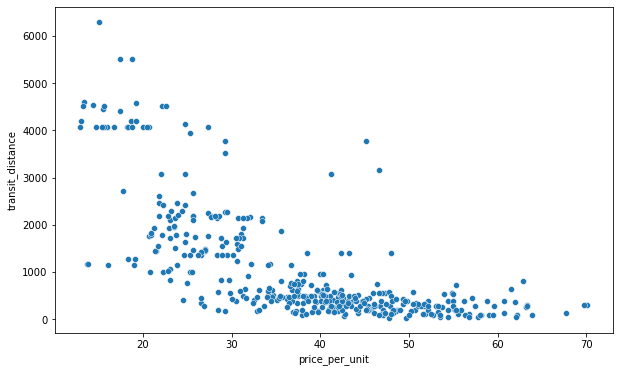

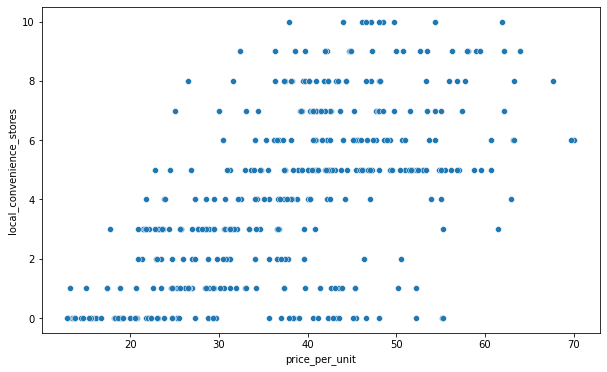

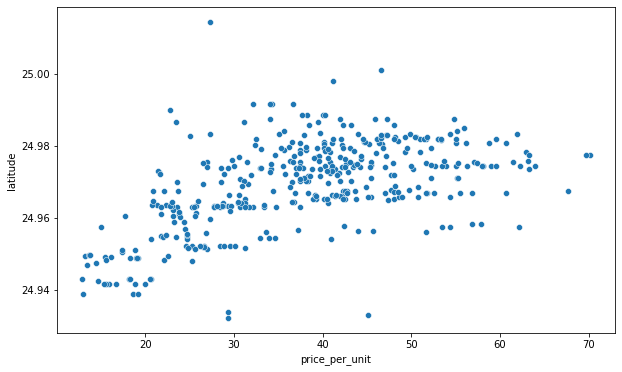

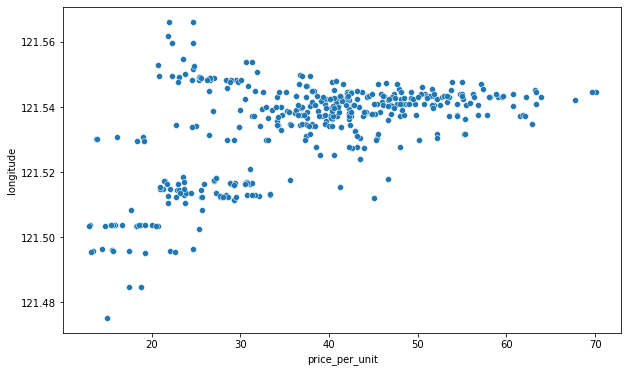

In [79]:
for col in data.columns[:-1]:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=data,x=data.columns[-1],y=col)
    plt.show()


In [80]:
# as we can see that transaction date has very less correlation with label so droping it 
data=data.drop(columns=['transaction_date'])

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [185]:
# Your code to use the trained model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
import numpy as np

In [141]:
x_train,x_test,y_train,y_test= train_test_split(data[data.columns[:-1]].values,data[data.columns[-1]].values,test_size=0.30)
# y_train= y_train.reshape((y_train.shape[0],1))
# y_test= y_test.reshape((y_test.shape[0],1))
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((282, 5), (121, 5), (282,), (121,))

In [142]:
pipeline1= Pipeline(steps=[('standscaler', StandardScaler()),
                          ('Regressor', LinearRegression())])



model1=pipeline1.fit(x_train,y_train)
print(model1)

Pipeline(steps=[('standscaler', StandardScaler()),
                ('Regressor', LinearRegression())])


MSE: 59.10367694787591 
 RMSE: 7.687891580132742 
 R2: 0.6402827400010888


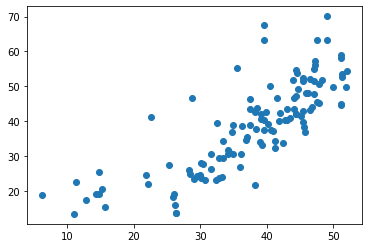

In [146]:
#mse error 
y_pred=model1.predict(x_test)
print(f'MSE: {mean_squared_error(y_test,y_pred)} \n RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))} \n R2: {r2_score(y_test,y_pred)}')
plt.scatter(y_pred,y_test)

In [202]:
numeric_features= [0,1,3,4]
numeric_transformer=Pipeline(steps=[('stdscaler', StandardScaler())])

preprocessor=ColumnTransformer(transformers=
                               [('transform',numeric_transformer,
                                 numeric_features)])

pipeline2= Pipeline(steps=[('prepro', preprocessor),
                          ('Regressor', RandomForestRegressor())])
model2=pipeline2.fit(x_train,y_train)
print(model2)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('transform',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('Regressor', RandomForestRegressor())])


MSE: 36.9811002728881 
 RMSE: 6.081208783859349 
 R2: 0.7749253388475288


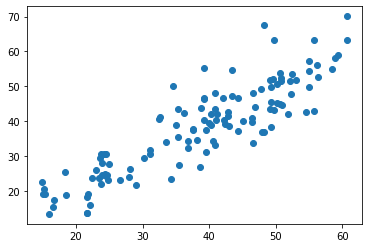

In [203]:
y_pred=model2.predict(x_test)
print(f'MSE: {mean_squared_error(y_test,y_pred)} \n RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))} \n R2: {r2_score(y_test,y_pred)}')
plt.scatter(y_pred,y_test)

In [206]:
import joblib
filename = './real_estate_model.pkl'
joblib.dump(model2, filename)

['./real_estate_model.pkl']

In [209]:
loaded_model= joblib.load(filename)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])
y_pred=loaded_model.predict(X_new)
y_pred

array([51.04813333, 16.58246667])